In [32]:
# You are now ready to use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables. 
# All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy.sql.expression import func

#import libraries to use

import pandas as pd
import matplotlib as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [33]:
# Choose a start date and end date for your trip. 
# Make sure that your vacation range is approximately 3-15 days total.

start = "2017-07-25"
end = "2017-08-01"



In [34]:
# Use SQLAlchemy create_engine to connect to your sqlite database.
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [35]:
# Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.

Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [36]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [37]:
session = Session(engine)

In [38]:
all_measure = session.query(Measurement).all()
len(all_measure), type(all_measure)

(18103, list)

In [39]:
# Design a query to retrieve the last 12 months of precipitation data.
# Select only the date and prcp values.
import datetime as dt

percipitation= session.query(Measurement.date, Measurement.prcp).filter(Measurement.station == "USC00519281").filter(Measurement.date >= (dt.date.today() - dt.timedelta(days=365))).all()
percipitation

[('2016-11-01', 0.1),
 ('2016-11-02', 0),
 ('2016-11-03', 0),
 ('2016-11-04', 0),
 ('2016-11-05', 0.03),
 ('2016-11-06', 0.01),
 ('2016-11-07', 0),
 ('2016-11-08', 0.21),
 ('2016-11-09', 0.11),
 ('2016-11-10', 0),
 ('2016-11-11', 0),
 ('2016-11-12', 0),
 ('2016-11-13', 0),
 ('2016-11-14', 0),
 ('2016-11-15', 0),
 ('2016-11-16', 0.24),
 ('2016-11-17', 0.01),
 ('2016-11-18', 0),
 ('2016-11-19', 0.11),
 ('2016-11-20', 0.39),
 ('2016-11-21', 0.11),
 ('2016-11-22', 2.05),
 ('2016-11-23', 0.25),
 ('2016-11-24', 0.3),
 ('2016-11-25', 0.08),
 ('2016-11-26', 0.06),
 ('2016-11-27', 0.17),
 ('2016-11-28', 0),
 ('2016-11-29', 0.09),
 ('2016-11-30', 0.05),
 ('2016-12-01', 0.37),
 ('2016-12-02', 0.35),
 ('2016-12-03', 0.77),
 ('2016-12-04', 0.04),
 ('2016-12-05', 0.22),
 ('2016-12-06', 0),
 ('2016-12-07', 0.12),
 ('2016-12-08', 0.07),
 ('2016-12-09', 0.31),
 ('2016-12-10', 0.02),
 ('2016-12-11', 0),
 ('2016-12-12', 0),
 ('2016-12-13', 0.04),
 ('2016-12-14', 0.92),
 ('2016-12-15', 0.14),
 ('2016-12-1

In [40]:
# http://pbpython.com/pandas-list-dict.html
# Load the query results into a Pandas DataFrame and set the index to the date column.

label = ["date", "Prcp"]
precipitation = pd.DataFrame.from_records(percipitation,columns = label).set_index('date', drop=True)
precipitation

,Prcp
date,
2016-11-01,0.10
2016-11-02,0.00
2016-11-03,0.00
2016-11-04,0.00
2016-11-05,0.03
2016-11-06,0.01
2016-11-07,0.00
2016-11-08,0.21
2016-11-09,0.11


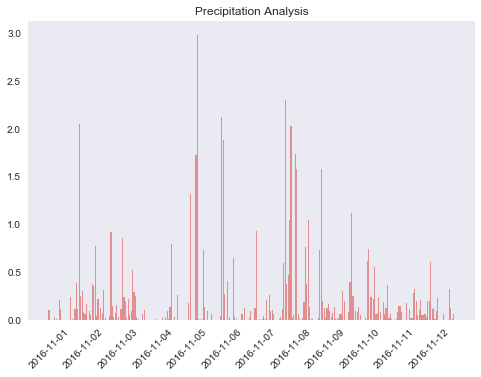

In [68]:
# Plot the results using the DataFrame plot method.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

colors = ["LightCoral", "LightSkyBlue", "Gold"]
sns.set_palette(colors,3,0.75)


value={"Prcp":precipitation["Prcp"]}
x = range(len(precipitation.index.values))
y = precipitation["Prcp"]
plt.bar(x, y ,align = "center")
labels = precipitation.index.values
plt.xticks(range(len(precipitation.index.values)), labels, rotation=45)
plt.title("Precipitation Analysis")
#you can change the nbins to whatever number and it will change the ticks

plt.locator_params(nbins=12, axis= "x")

plt.grid()



plt.show()


In [42]:
# station analysis

# Design a query to calculate the total number of stations.
station_num= session.query(Station.station).count()

station_num

9

In [43]:
station_num2 = session.query(Measurement.station).group_by(Measurement.station).count()
station_num2

9

In [44]:
# Design a query to find the most active stations.
# List the stations and observation counts in descending order
# Which station has the highest number of observations?


base_query = session.query(Measurement.station, func.count(Measurement.tobs).label('count')).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

base_query

# USC00519281 has the highest observations

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [45]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
# Filter by the station with the highest number of observations.


tobs_12month= session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == "USC00519281").filter(Measurement.date >= (dt.date.today() - dt.timedelta(days=365))).all()

tobs_12month

[('2016-11-01', 74),
 ('2016-11-02', 75),
 ('2016-11-03', 75),
 ('2016-11-04', 75),
 ('2016-11-05', 75),
 ('2016-11-06', 71),
 ('2016-11-07', 63),
 ('2016-11-08', 70),
 ('2016-11-09', 68),
 ('2016-11-10', 67),
 ('2016-11-11', 77),
 ('2016-11-12', 74),
 ('2016-11-13', 77),
 ('2016-11-14', 76),
 ('2016-11-15', 76),
 ('2016-11-16', 75),
 ('2016-11-17', 76),
 ('2016-11-18', 75),
 ('2016-11-19', 73),
 ('2016-11-20', 75),
 ('2016-11-21', 73),
 ('2016-11-22', 75),
 ('2016-11-23', 74),
 ('2016-11-24', 75),
 ('2016-11-25', 74),
 ('2016-11-26', 75),
 ('2016-11-27', 73),
 ('2016-11-28', 75),
 ('2016-11-29', 73),
 ('2016-11-30', 73),
 ('2016-12-01', 74),
 ('2016-12-02', 70),
 ('2016-12-03', 72),
 ('2016-12-04', 70),
 ('2016-12-05', 67),
 ('2016-12-06', 67),
 ('2016-12-07', 69),
 ('2016-12-08', 70),
 ('2016-12-09', 68),
 ('2016-12-10', 69),
 ('2016-12-11', 69),
 ('2016-12-12', 66),
 ('2016-12-13', 65),
 ('2016-12-14', 68),
 ('2016-12-15', 62),
 ('2016-12-16', 75),
 ('2016-12-17', 70),
 ('2016-12-18

In [46]:
# Plot the results as a histogram with bins=12.
# Clarification added by pavan on wed oct 18 8:35 pm
# # Choose the station with the highest number of temperature observations.
# # Query the last 12 months of temperature observation data for this station and plot the results as a histogram
label2 = ["date", "tobs"]
tobs = pd.DataFrame.from_records(tobs_12month,columns = label2).set_index('date', drop=True)
tobs.head()


,tobs
date,
2016-11-01,74
2016-11-02,75
2016-11-03,75
2016-11-04,75
2016-11-05,75


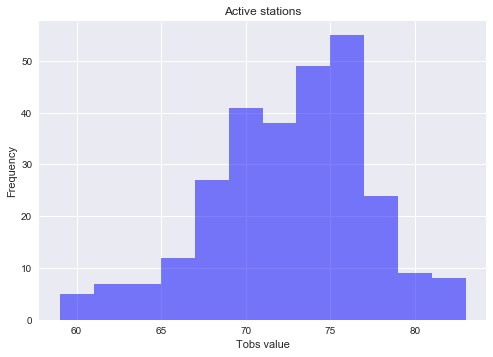

In [47]:
# Plot the results as a histogram with bins=12.
x = tobs["tobs"]
num_bins = 12
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.title("Active stations")
plt.xlabel("Tobs value")
plt.ylabel("Frequency")
plt.show()


In [48]:
# test the query with small start and end date
start1 = "2017-07-25"
end1 = "2017-07-26"
# temp = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.date >= start1).filter(Measurement.date <= end1).all()
# temp

In [49]:
# tem= session.query(func.avg(Measurement.tobs)).filter(Measurement.date >= start1).filter(Measurement.date <= end1).all()
# tem

In [50]:
# Temperature Analysis
# Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d 
# and return the minimum, average, and maximum temperatures for that range of dates.

def calc_temp (start, end):
    
#     temp = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= start).filter(Measurement.date <= end).all()
    min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.date >= start).filter(Measurement.date <= end).all()
    avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.date >= start).filter(Measurement.date <= end).all()
    max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.date >= start).filter(Measurement.date <= end).all()
    diff_temp = session.query(func.max(Measurement.tobs)-func.min(Measurement.tobs)).filter(Measurement.date >= start1).filter(Measurement.date <= end1).all()

    return min_temp, max_temp, avg_temp, diff_temp
    
temperature = calc_temp(start1, end1)
temperature

([(73)], [(84)], [(78.92307692307692)], [(11)])

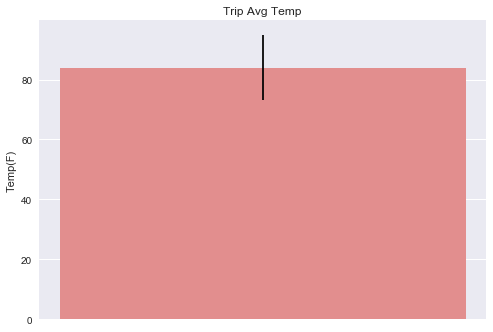

In [51]:
# Plot the min, avg, and max temperature from your previous query as a bar chart.
# Use the average temperature as the bar height.
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).


data =   temperature[1]
error =  temperature[3]
xlocations = 0.5
width = 0.25

plt.bar(xlocations, data[0], width=width , yerr=error[0])

plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.ylabel("Temp(F)")
plt.title("Trip Avg Temp")

plt.show()
